In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt
n=10
eps=0.2

In [12]:
def get_reward(prob, n=10):
  reward=0
  for i in range(n):
    if random.random() < prob:
      reward+=1
  return reward

In [13]:
reward_test= [get_reward(0.8) for _ in range(2000)]

In [14]:
np.mean(reward_test)

np.float64(7.968)

(array([  2.,   2.,   8.,  46.,   0., 211., 424., 560., 520., 227.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

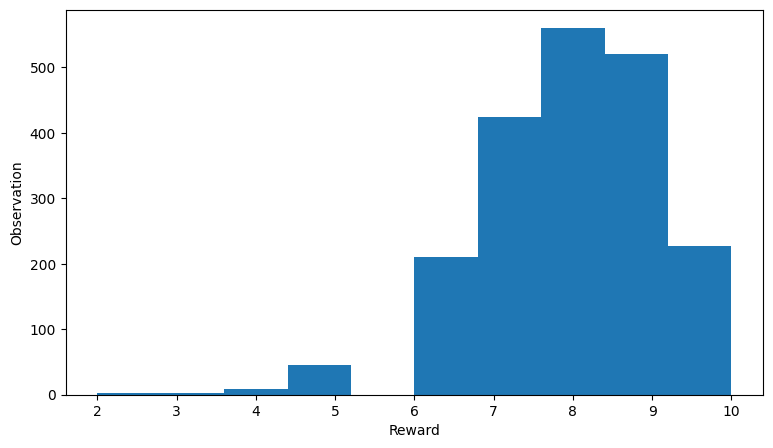

In [15]:
plt.figure(figsize=(9, 5))
plt.xlabel("Reward")
plt.ylabel("Observation")
plt.hist(reward_test, bins=10)

In [16]:
record=np.zeros((n, 2)) # n rows, 2 cols where first cols: no of arms pulled and 2nd cols the avg reward

In [17]:
def get_best_arm(record):
  arm_index=np.argmax(record[:, 1], axis=0)
  return arm_index

def update_record(record, action, r):
  new_r=(record[action, 0] * record[action, 1] + r) / (record[action, 0]+1)
  record[action, 0]+=1
  record[action, 1]=new_r
  return record


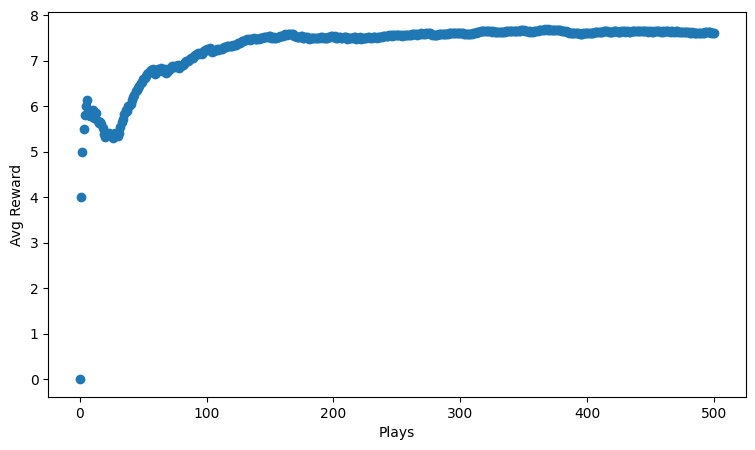

In [18]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
probs=np.random.rand(n)

for i in range(500):
  if random.random() > eps:
    choice=get_best_arm(record) #exploitation
  else:
    choice=np.random.randint(10) #exploration
  r=get_reward(probs[choice])
  record=update_record(record, choice, r)
  mean_reward=((i+1) * rewards[-1]+r)/(i+2)
  rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)), rewards)


In [19]:
#@ Defining Softmax:
def softmax(action_val, tau=1.12):
  probab=(np.exp(action_val/tau)) / np.sum(np.exp(action_val/tau))
  return probab


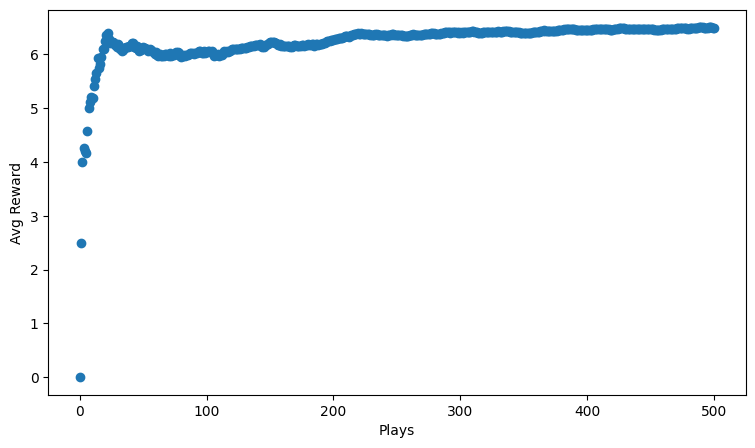

In [20]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
probs=np.random.rand(n)

for i in range(500):
  p=softmax(record[:, 1]) #computes probabilites of action-value for each arms
  choice=np.random.choice(np.arange(n), p=p) # Chooses an arm randomly but weighted by the softmax probabilities
  r=get_reward(probs[choice])
  record=update_record(record, choice, r)
  mean_reward=((i+1) * rewards[-1]+r)/(i+2)
  rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)), rewards)

## Contextual Bandit Environment

In [23]:
class ContextBandit:
  def __init__(self, arms=10):
    '''arms is being used as possible context and actions '''
    self.arms=arms
    self.init_distribution(arms)
    self.update_state() #randomly chooses an initial state

  def init_distribution(self, arms):
    ''' -It is a probability matrix
        - number of states= no of arms, to keep things simple.
        - Each row represents a state and each column an arm'''
    self.bandit_matrix=np.random.rand(arms, arms) #bandit_matrix[s, a]

  def reward(self, prob):
    reward=0
    for i in range(self.arms):
      if random.random()< prob:
        reward+=1
    return reward

  def get_state(self):
    '''returns the current state set by update state'''
    return self.state

  def update_state(self):
    self.state=np.random.randint(0, self.arms)

  def get_reward(self, arm):
    return self.reward(self.bandit_matrix[self.get_state()][arm])

  def choose_arm(self, arm):
    ''' chooses an arm returns a reward and updates the state'''
    reward=self.get_reward(arm)
    self.update_state()
    return reward

In [26]:
env = ContextBandit(arms=10)
state = env.get_state()
reward = env.choose_arm(1)

state, reward

(9, 1)